# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div>

# Задание:
    Реализовать модель логистической регрессии с использованием pytorch
    Тестовый набор данных выбирается самостоятельно

http://pytorch.org/

https://github.com/pytorch/examples

http://pytorch.org/tutorials/

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from sklearn import linear_model, datasets, metrics

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class LgRNet(nn.Module):
    def __init__(self, n_features = 2, n_classes = 2):
        super(LgRNet, self).__init__()
        self.fc1 = nn.Linear(n_features, n_classes)
        self.fc2 = nn.functional.sigmoid
        #self.ceriation = nn.BCELoss(size_average=True)
        self.ceriation = nn.CrossEntropyLoss()
    def forward(self, x, target):
        x = self.fc2(self.fc1(x))
        loss = self.ceriation(x, target)
        return x, loss
    def predict(self, x):
        x = (self.fc2(self.fc1(Variable(torch.Tensor(x)))).data.numpy()).argmax(axis=1)
        return x
    def name(self):
        return 'lgrnet'

In [4]:
torch.manual_seed(42)
np.random.seed(42)

In [17]:
iris = datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target
#X = iris.data[iris.target!=2,:2]
#Y = iris.target[iris.target!=2]

In [18]:
lin_logr = linear_model.LogisticRegression()
lin_logr.fit(X,Y)
metrics.accuracy_score(Y, lin_logr.predict(X))

0.76666666666666672

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
def pt(estim):
    h=0.02
    try:
        print(metrics.accuracy_score(Y, estim.predict(X)))
    except:
        print(type(Y), type(estim.predict(X)))
        
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estim.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

0.766666666667


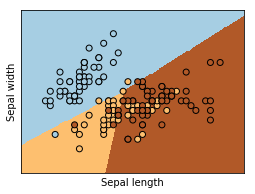

In [21]:
pt(lin_logr)

In [22]:
x = Variable(torch.Tensor(X), requires_grad=False)
y = Variable(torch.LongTensor(Y.tolist()), requires_grad=False)

In [23]:
N = X.shape[1]
M = np.unique(Y).size

In [29]:
model = LgRNet(n_features=N, n_classes=M).cpu()

0.333333333333


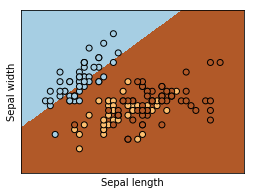

In [30]:
pt(model)

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_loss = []
accuracy_list = []
for epoch in range(100):    
    
    _, loss = model(x, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    accuracy_list.append(metrics.accuracy_score(Y, model.predict(X)))
    if epoch%1000 == 0:
        print('==>>> epoch: {}, train loss: {:.6f}'.format(epoch, loss.data[0]))
    train_loss.append(loss.data[0])
    
torch.save(model.state_dict(), model.name())
print(np.array(accuracy_list).argmax())

==>>> epoch: 0, train loss: 1.085501
75


0.66


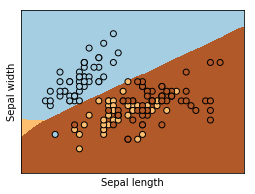

In [32]:
pt(model)

In [28]:
 model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)